In [51]:
 #  A Whale off the Port(folio)

 #In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [52]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
# Data Cleaning

# In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

# Files:
# 1. whale_returns.csv
# 2. algo_returns.csv
# 3. sp500_history.csv

In [54]:
## Whale Returns

# Read the Whale Portfolio daily returns and clean the data

In [55]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
# YOUR CODE HERE
whale_returns_data = pd.read_csv(whale_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
whale_returns_data = whale_returns_data.sort_index(ascending = True)
whale_returns_data.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-02                        NaN                 NaN   
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-02                          NaN                     NaN  
2015-03-03                    -0.000496               -0.006569  
2015-03-04                    -0.002534                0.004213  
2015-03-05                     0.002355                0.006726  
2015-03-06                    -0.008481               -0.013098

In [56]:
# Count nulls
# YOUR CODE HERE
whale_returns_data.isna().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [57]:
# Drop nulls
# YOUR CODE HERE
whale_returns_data = whale_returns_data.dropna().copy()
whale_returns_data.isna().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [58]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
# YOUR CODE HERE
algo_returns_data = pd.read_csv(algo_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
algo_returns_data = algo_returns_data.sort_index(ascending = True)
algo_returns_data.head()

Algo 1  Algo 2
Date                        
2014-05-28  0.001745     NaN
2014-05-29  0.003978     NaN
2014-05-30  0.004464     NaN
2014-06-02  0.005692     NaN
2014-06-03  0.005292     NaN

In [59]:
# Count nulls
# YOUR CODE HERE
algo_returns_data.isna().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [60]:
# Drop nulls
# YOUR CODE HERE
algo_returns_data = algo_returns_data.dropna().copy()
algo_returns_data.isna().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [61]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")
# YOUR CODE HERE
sp500_history_data = pd.read_csv(sp500_history_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
sp500_history_data = sp500_history_data.sort_index(ascending = True)
sp500_history_data.head()

Close
Date                
2012-10-01  $1444.49
2012-10-02  $1445.75
2012-10-03  $1450.99
2012-10-04  $1461.40
2012-10-05  $1460.93

In [62]:
# Check Data Types
# YOUR CODE HERE
sp500_history_data.dtypes

Close    object
dtype: object

In [63]:
# Fix Data Types
# YOUR CODE HERE
sp500_history_data['Close'] = sp500_history_data['Close'].str.replace('$', '')
sp500_history_data['Close'] = sp500_history_data['Close'].astype('float')
sp500_history_data.dtypes

Close    float64
dtype: object

In [64]:
# Calculate Daily Returns
# YOUR CODE HERE
sp500_history_returns = sp500_history_data.pct_change().copy()
sp500_history_returns.head()

Close
Date                
2012-10-01       NaN
2012-10-02  0.000872
2012-10-03  0.003624
2012-10-04  0.007174
2012-10-05 -0.000322

In [65]:
# Drop nulls
# YOUR CODE HERE
sp500_history_returns = sp500_history_returns.dropna().copy()
sp500_history_returns.head()

Close
Date                
2012-10-02  0.000872
2012-10-03  0.003624
2012-10-04  0.007174
2012-10-05 -0.000322
2012-10-08 -0.003457

In [66]:
# Rename Column
# YOUR CODE HERE
sp500_history_returns = sp500_history_returns.rename(columns={"Close": "S&P 500"})
sp500_history_returns.head()   

S&P 500
Date                
2012-10-02  0.000872
2012-10-03  0.003624
2012-10-04  0.007174
2012-10-05 -0.000322
2012-10-08 -0.003457

## Combine Whale, Algorithmic, and S&P 500 Returns

In [67]:
# Concatenate all DataFrames into a single DataFrame
# YOUR CODE HERE
combined_daily_returns = pd.concat([whale_returns_data,algo_returns_data,sp500_history_returns], axis="columns", join="inner")
combined_daily_returns.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                    -0.000496               -0.006569 -0.001942   
2015-03-04                    -0.002534                0.004213 -0.008589   
2015-03-05                     0.002355                0.006726 -0.000955   
2015-03-06                    -0.008481               -0.013098 -0.004957   
2015-03-09                     0.005843               -0.001652 -0.005447   

              Algo 2   S&P 500  
Date                            
2015-03-03 -0.000949 -0.004539  
2015-03-04  0.002416 -0.004389  
2015-03-05  0.004323  0.001196  
2015-03-06 -0.011460 -0.014174  
2015-03-09  0.001303  0.003944

---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

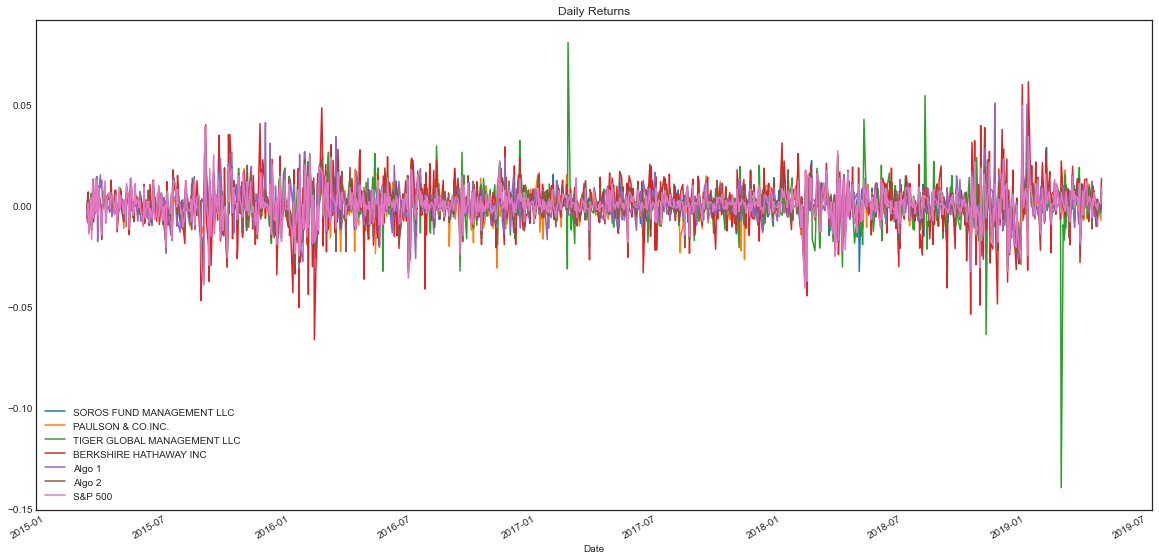

In [68]:
# Plot daily returns
# YOUR CODE HERE
plt.style.use('seaborn-white')
combined_daily_returns.plot(title = "Daily Returns", figsize = [20, 10])


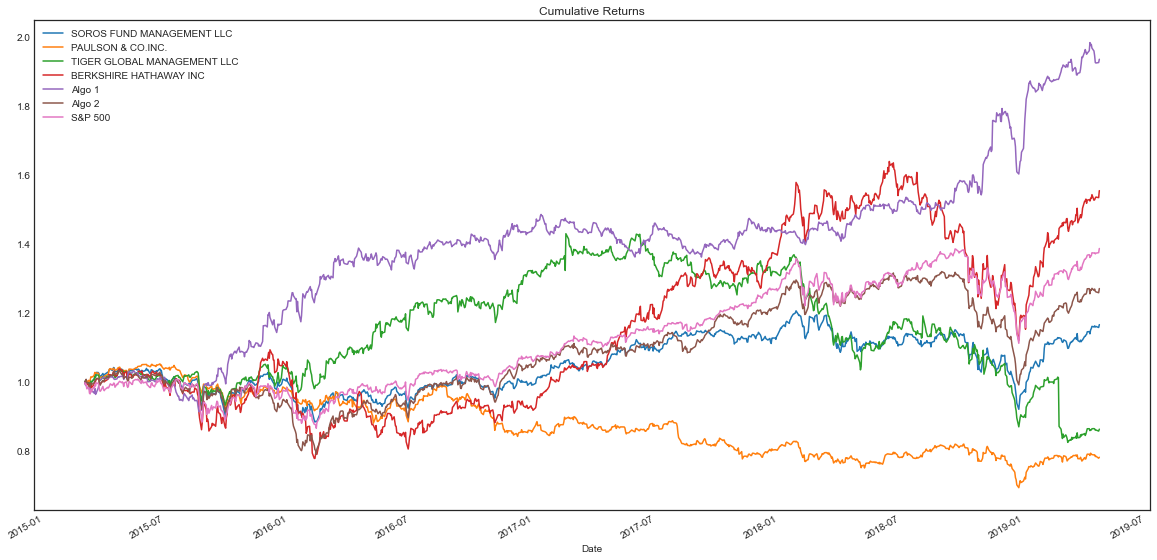

In [69]:
# Plot cumulative returns
# YOUR CODE HERE
combined_cumulative_returns = (1+combined_daily_returns).cumprod()
plt.style.use('seaborn-white')
combined_cumulative_returns.plot(title = "Cumulative Returns", figsize = [20, 10])


### Does any portfolio outperform the S&P 500?

**The cumulative returns show that Algo Strategy 1 and the 'whale' portfolio, Berkshire Hathaway both outperformed the S&P 500.**

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

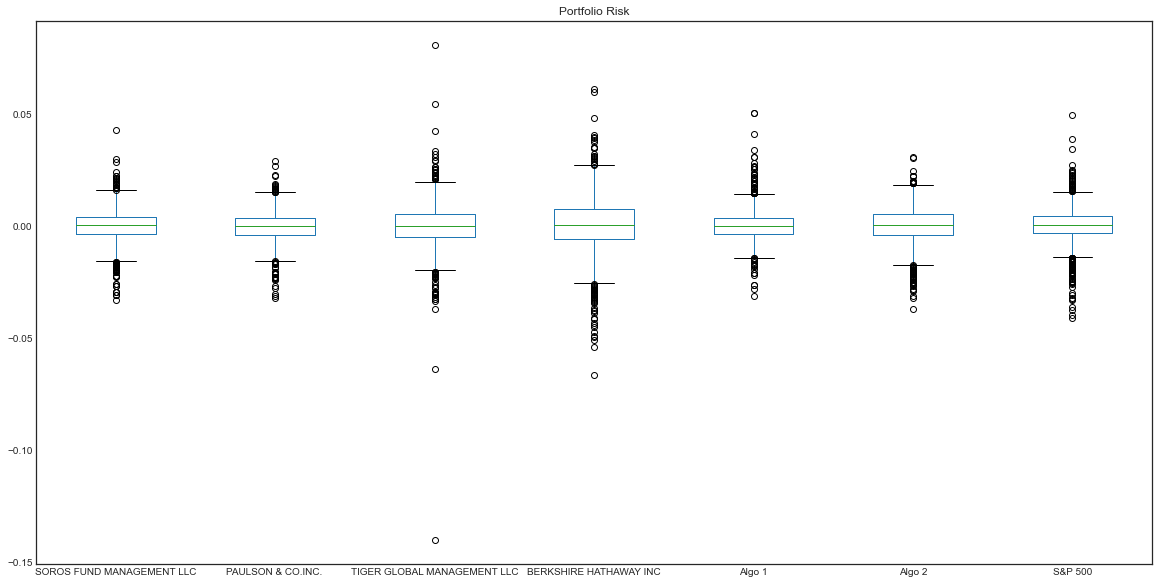

In [70]:
# Box plot to visually show risk
# YOUR CODE HERE
plt.style.use('seaborn-white') 
combined_daily_returns.plot.box(title = "Portfolio Risk", figsize = [20, 10])


In [71]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?
# YOUR CODE HERE
combined_std = combined_daily_returns.std()
combined_std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
dtype: float64

In [72]:
# Determine which portfolios are riskier than the S&P 500
# YOUR CODE HERE
riskierthan_sp500 = combined_std.gt(combined_std['S&P 500'])
riskierthan_sp500

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P 500                        False
dtype: bool

In [73]:
# Calculate the annualized standard deviation (252 trading days)
# YOUR CODE HERE
combined_annualized_std = combined_std * np.sqrt(252)
combined_annualized_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

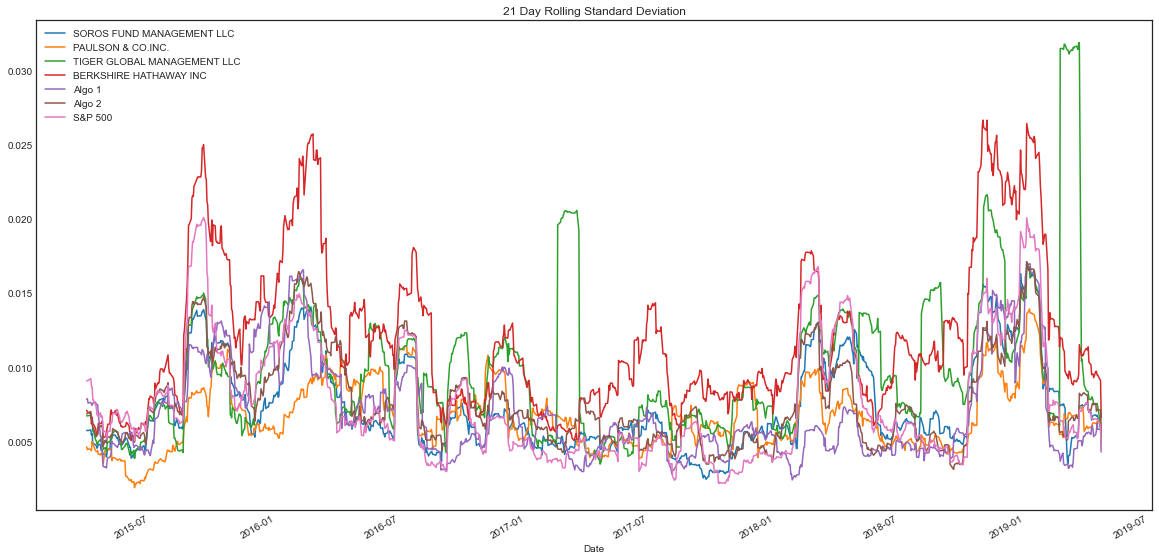

In [74]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
# YOUR CODE HERE
combined_std_21 = combined_daily_returns.rolling(window=21).std()
plt.style.use('seaborn-white')
combined_std_21.plot(title = "21 Day Rolling Standard Deviation", figsize = [20, 10])


### Does the risk increase for each of the portfolios at the same time risk increases in the S&P?

**Based on risk measured by standard deviation, one can say that for most portfolios, risk increased in line with the increase in risk of the S&P 500 except for Tiger Global and Berkshire Hathaway which were much more riskier than the market.**

In [75]:
# Construct a correlation table
# YOUR CODE HERE
correlation = combined_daily_returns.corr()
correlation.style.background_gradient(cmap='summer')


### Which returns most closely mimic the S&P?

**The correlation table shows that Soros Fund, Algo 2 and Berkshire Hathaway closely mimic the returns of the S&P 500.**

Algo 1 Cov: 1.821774999163282e-05 | S&P 500 Var: 7.316632424648712e-05 | Algo 1 Beta: 0.2489909145942574


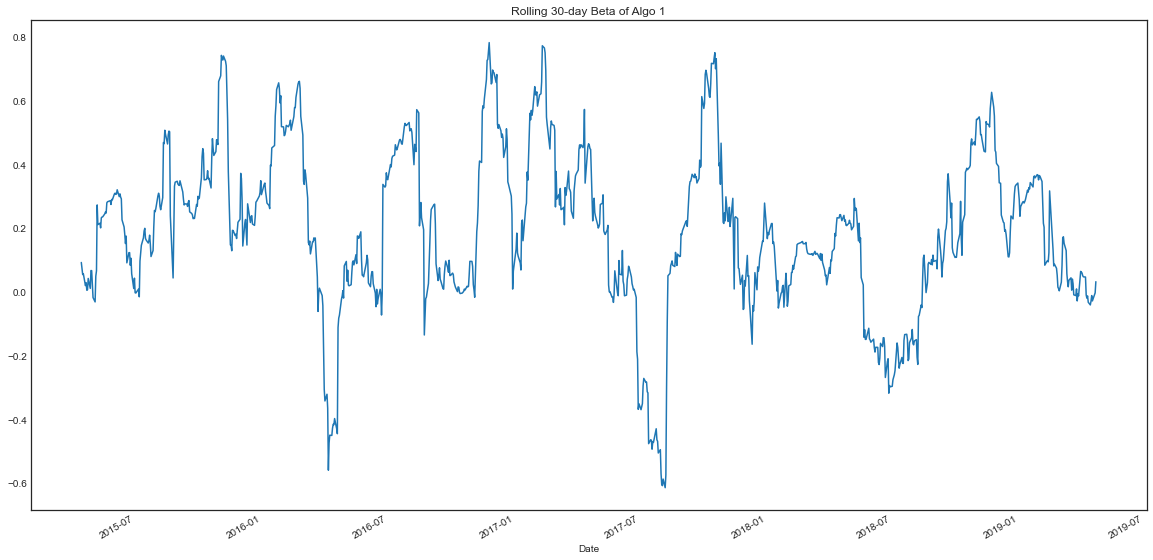

In [76]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
# YOUR CODE HERE
algo1_cov = combined_daily_returns['Algo 1'].cov(combined_daily_returns['S&P 500'])
variance = combined_daily_returns['S&P 500'].var()
algo1_beta = algo1_cov / variance
print(f"Algo 1 Cov: {algo1_cov} | S&P 500 Var: {variance} | Algo 1 Beta: {algo1_beta}")

rolling_algo1_cov = combined_daily_returns['Algo 1'].rolling(window=30).cov(combined_daily_returns['S&P 500'])
rolling_variance = combined_daily_returns['S&P 500'].rolling(window=30).var()
rolling_algo1_beta = rolling_algo1_cov / rolling_variance
plt.style.use('seaborn-white')
rolling_algo1_beta.plot(title = "Rolling 30-day Beta of Algo 1", figsize = [20, 10])


### Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?

**The beta value for Algo 1 is 0.25 indicating that the portfolio has less volatility as compared to the S&P 500.**

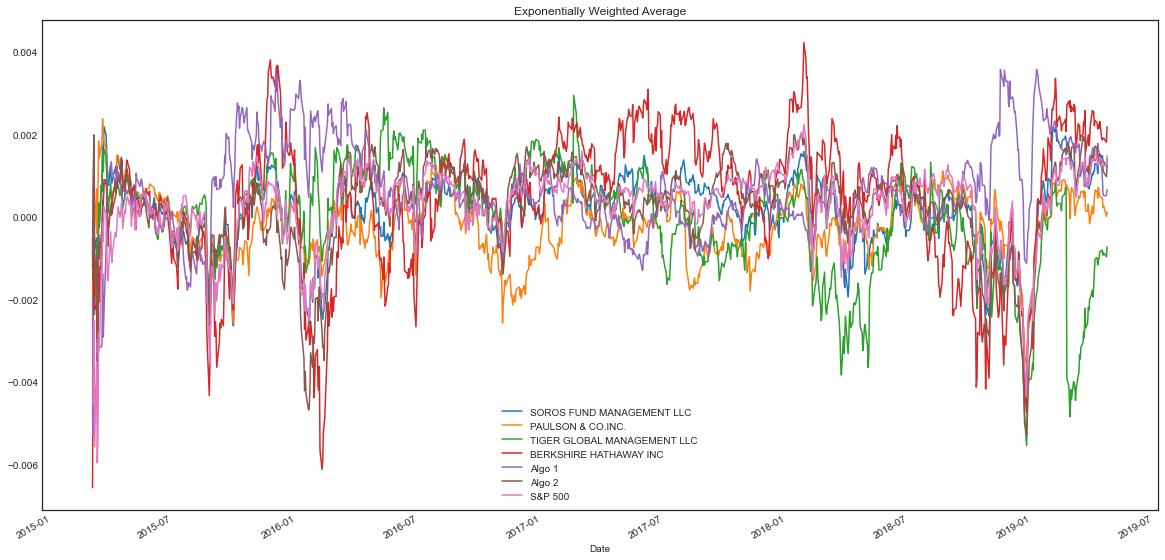

In [77]:
# Calculate a rolling window using the exponentially weighted moving average. 
# YOUR CODE HERE
ewm_combined = combined_daily_returns.ewm(halflife=21).mean()
plt.style.use('seaborn-white')
ewm_combined.plot(title = "Exponentially Weighted Average", figsize = [20, 10])


---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [78]:
# Calculate annualized Sharpe Ratios
# YOUR CODE HERE
sharpe_ratios = (combined_daily_returns.mean() * 252) / (combined_daily_returns.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64

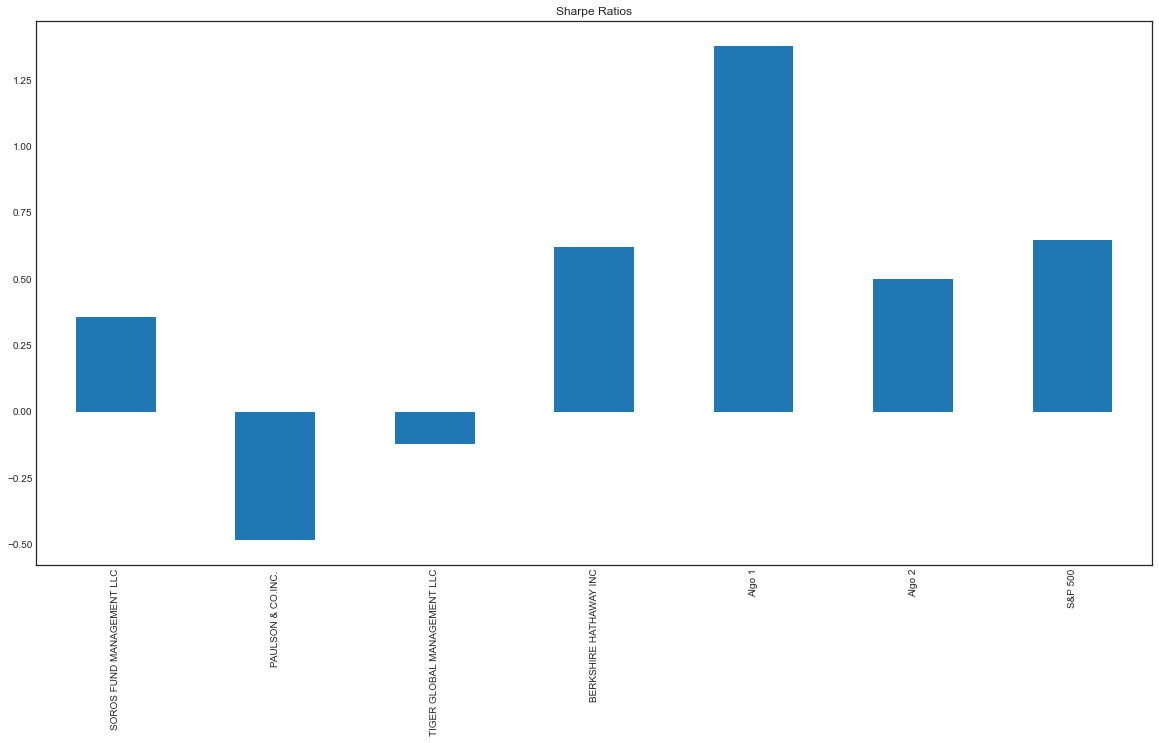

In [79]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
plt.style.use('seaborn-white')
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios", figsize = [20, 10])


On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:

**The Sharpe Ratios show that Algo strategy 1 has generated a higher return on a risk-adjusted basis. It outperformed the market i.e. S&P 500 and the 'whale' investor portfolio-Berkshire Hathaway by more than 2 times.** 

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [80]:
# Read the first stock
# YOUR CODE HERE
appl_hist_csv = Path("Resources/appl_hist.csv")
appl_data = pd.read_csv(appl_hist_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
appl_data = appl_data.sort_index(ascending = True)
appl_data.head()

Symbol   Close
Date                     
2015-03-02   AAPL  129.09
2015-03-03   AAPL  129.36
2015-03-04   AAPL  128.54
2015-03-05   AAPL  126.41
2015-03-06   AAPL  126.60

In [81]:
# Read the second stock
# YOUR CODE HERE
amzn_hist_csv = Path("Resources/amzn_hist.csv")
amzn_data = pd.read_csv(amzn_hist_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
amzn_data = amzn_data.sort_index(ascending = True)
amzn_data.head()

Symbol   Close
Date                     
2015-03-02   AMZN  385.66
2015-03-03   AMZN  384.61
2015-03-04   AMZN  382.72
2015-03-05   AMZN  387.83
2015-03-06   AMZN  380.09

In [82]:
# Read the third stock
# YOUR CODE HERE
jnj_hist_csv = Path("Resources/jnj_hist.csv")
jnj_data = pd.read_csv(jnj_hist_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
jnj_data = jnj_data.sort_index(ascending = True)
jnj_data.head()

Symbol   Close
Date                     
2015-03-02    JNJ  103.22
2015-03-03    JNJ  102.34
2015-03-04    JNJ  101.65
2015-03-05    JNJ  102.52
2015-03-06    JNJ  100.11

In [83]:
# Concatenate all stocks into a single DataFrame
# YOUR CODE HERE
my_portfolio = pd.concat([appl_data,amzn_data,jnj_data], axis="rows", join="inner")
my_portfolio.tail()

Symbol   Close
Date                     
2019-04-23    JNJ  139.90
2019-04-24    JNJ  139.20
2019-04-25    JNJ  139.65
2019-04-26    JNJ  140.39
2019-04-29    JNJ  139.84

In [84]:
# Reset the index
# YOUR CODE HERE
my_portfolio = my_portfolio.reset_index()
my_portfolio.head()

Date Symbol   Close
0 2015-03-02   AAPL  129.09
1 2015-03-03   AAPL  129.36
2 2015-03-04   AAPL  128.54
3 2015-03-05   AAPL  126.41
4 2015-03-06   AAPL  126.60

In [85]:
# Pivot so that each column of prices represents a unique symbol
# YOUR CODE HERE
my_portfolio = my_portfolio.pivot_table(values="Close", index="Date", columns="Symbol")
my_portfolio.head()

Symbol        AAPL    AMZN     JNJ
Date                              
2015-03-02  129.09  385.66  103.22
2015-03-03  129.36  384.61  102.34
2015-03-04  128.54  382.72  101.65
2015-03-05  126.41  387.83  102.52
2015-03-06  126.60  380.09  100.11

In [86]:
# Drop Nulls
# YOUR CODE HERE
my_portfolio = my_portfolio.dropna().copy()
my_portfolio.isna().sum()

Symbol
AAPL    0
AMZN    0
JNJ     0
dtype: int64

In [87]:
## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [88]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
# YOUR CODE HERE
my_portfolio_returns = my_portfolio.pct_change()
# my_portfolio_returns.head()
my_weighted_port_returns = my_portfolio_returns.dot(weights)
my_weighted_port_returns.head()

Date
2015-03-02         NaN
2015-03-03   -0.003052
2015-03-04   -0.005998
2015-03-05    0.001780
2015-03-06   -0.013987
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [89]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
# YOUR CODE HERE
all_portfolio_returns = pd.concat([whale_returns_data,algo_returns_data,sp500_history_returns], axis="columns", join="inner")
all_portfolio_returns["Custom Portfolio"]= my_weighted_port_returns
all_portfolio_returns.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                    -0.000496               -0.006569 -0.001942   
2015-03-04                    -0.002534                0.004213 -0.008589   
2015-03-05                     0.002355                0.006726 -0.000955   
2015-03-06                    -0.008481               -0.013098 -0.004957   
2015-03-09                     0.005843               -0.001652 -0.005447   

              Algo 2   S&P 500  Custom Portfolio  
Date                                              
2015-03-03 -0.000949 -0.004539         -0.003052  
2015-03-04  0.002416 -0.004389         -0.005998  
2015-03-05  0.004323  0.001196          0.001780  
2015-03-06 -0.011460 -0.014174         -0.013987  
2015-03-09  0.001303  0.003944          0.001911

In [90]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# YOUR CODE HERE
all_portfolio_returns = all_portfolio_returns.dropna().copy()
all_portfolio_returns.isna().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P 500                        0
Custom Portfolio               0
dtype: int64

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

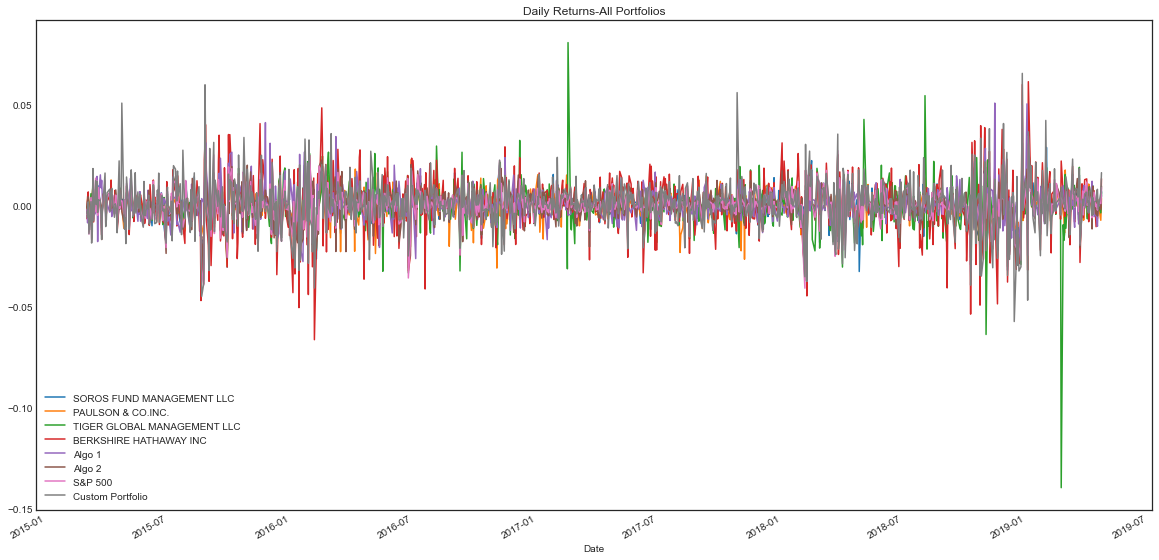

In [91]:
# Plot daily returns
plt.style.use('seaborn-white')
all_portfolio_returns.plot(title = "Daily Returns-All Portfolios", figsize = [20, 10])

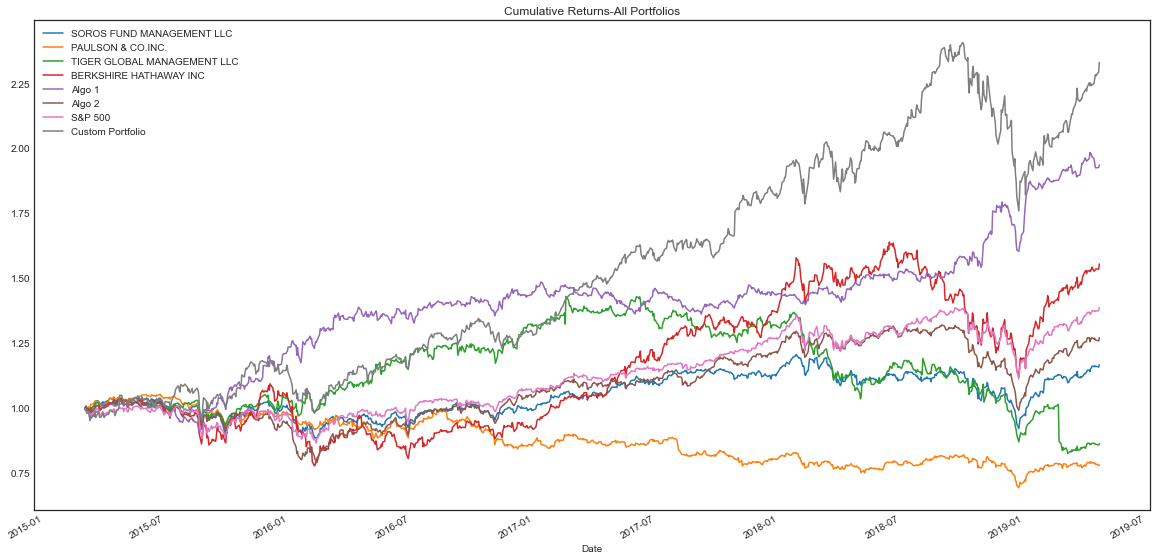

In [92]:
# Plot cumulative returns
all_port_cumulative_returns = (1+all_portfolio_returns).cumprod()
plt.style.use('seaborn-white')
all_port_cumulative_returns.plot(title = "Cumulative Returns-All Portfolios", figsize = [20, 10])

In [93]:
# Risk
# YOUR CODE HERE
all_port_std = all_portfolio_returns.std()
all_port_std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
Custom Portfolio               0.011616
dtype: float64

In [94]:
# Portfolios are riskier than the S&P 500
riskierthan_sp500 = all_port_std.gt(all_port_std['S&P 500'])
riskierthan_sp500

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P 500                        False
Custom Portfolio                True
dtype: bool

In [95]:
# Annualized standard deviation (252 trading days)
all_port_annualized_std = all_port_std * np.sqrt(252)
all_port_annualized_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
Custom Portfolio               0.184404
dtype: float64

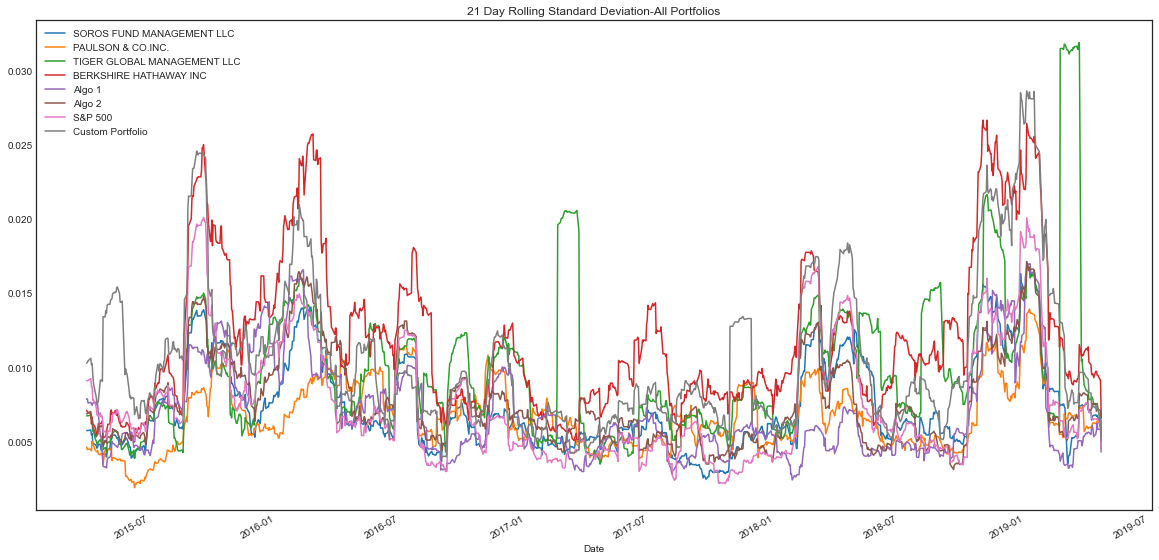

In [96]:
# Rolling
# YOUR CODE HERE
all_port_std_21 = all_portfolio_returns.rolling(window=21).std()
plt.style.use('seaborn-white')
all_port_std_21.plot(title = "21 Day Rolling Standard Deviation-All Portfolios", figsize = [20, 10])


In [97]:
# Annualized Sharpe Ratios
# YOUR CODE HERE
all_port_sharpe_ratios = (all_portfolio_returns.mean() * 252) / (all_portfolio_returns.std() * np.sqrt(252))
all_port_sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
Custom Portfolio               1.201014
dtype: float64

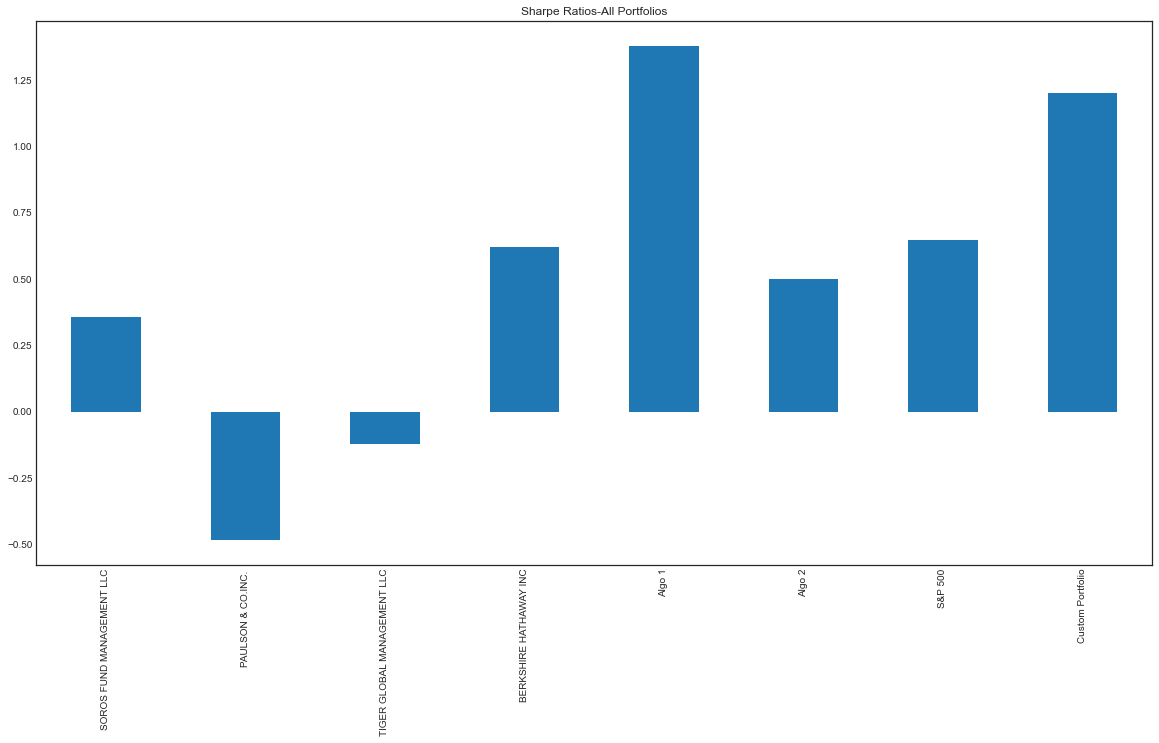

In [98]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
plt.style.use('seaborn-white')
all_port_sharpe_ratios.plot(kind="bar", title="Sharpe Ratios-All Portfolios", figsize = [20,10])


In [99]:
# Create a correlation analysis
# YOUR CODE HERE
all_port_correlation = all_portfolio_returns.corr()
all_port_correlation.style.background_gradient(cmap='summer')


Custom Cov: 8.047515498400601e-05 | S&P 500 Var: 7.316632424648712e-05 | Custom Beta: 1.0998933705197005


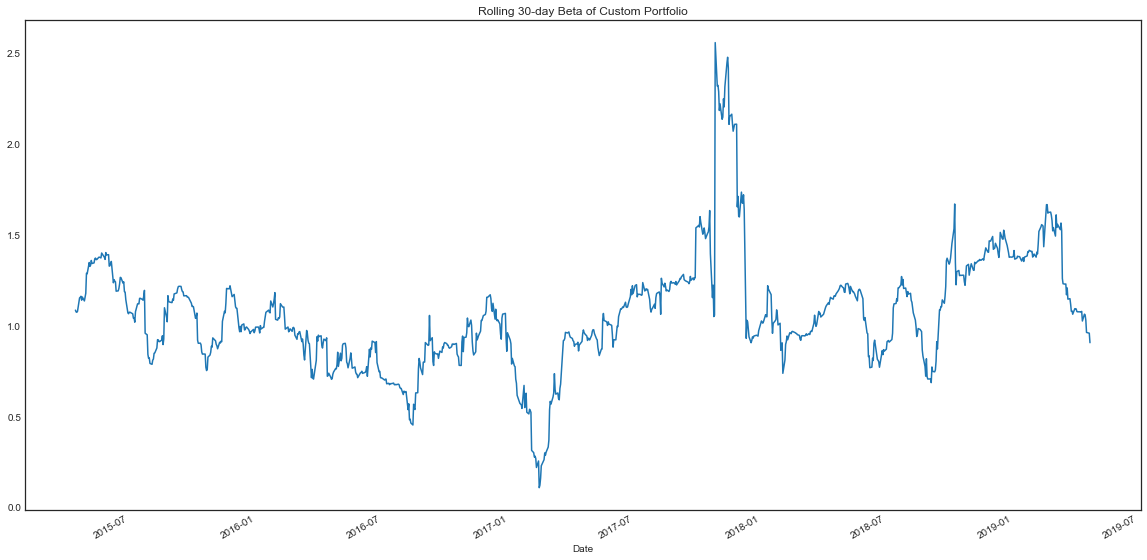

In [100]:
# Beta
# YOUR CODE HERE
custom_cov = all_portfolio_returns['Custom Portfolio'].cov( all_portfolio_returns['S&P 500'])
snp_variance =  all_portfolio_returns['S&P 500'].var()
custom_beta = custom_cov / snp_variance
print(f"Custom Cov: {custom_cov} | S&P 500 Var: {snp_variance} | Custom Beta: {custom_beta}")

rolling_custom_cov = all_portfolio_returns['Custom Portfolio'].rolling(window=30).cov(all_portfolio_returns['S&P 500'])
rolling_snp_variance = all_portfolio_returns['S&P 500'].rolling(window=30).var()
rolling_custom_beta = rolling_custom_cov / rolling_snp_variance
plt.style.use('seaborn-white')
rolling_custom_beta.plot(title = "Rolling 30-day Beta of Custom Portfolio", figsize = [20,10])


### Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?

**The custom portfolio marked the highest cumulative return in comparison to other portfolios including the market(S&P 500). But when we assess risk as measured by standard deviation, the custom portfolio belonged in the top 3 riskiest portfolios in comparison to the market. The others being Berkshire Hathaway and Tiger Global. The custom portfolio had a high correlation to the market and a beta value greater than 1 indicating more volatility. Evaluating the risk-adjusted portfolio returns measured by the Sharpe ratio, the custom portfolio outperformed the S&P500 but was lower than the Algo 1 portfolio. Therefore, one can easily say that the algorithmic portfolio strategy 1 appears to be a solid investment option with its lower risk and highest return.**